# Tugas 04 : **Centrality**

NAMA : M Hasan Basri

NIM  : 2104

MATA KULIAH : Pencarian dan Penambangan Web - A

Centrality adalah konsep dalam teori graf yang digunakan untuk mengukur pentingnya suatu simpul (node) dalam sebuah jaringan (graph). Dalam jaringan, simpul-simpul saling terhubung oleh tepi (edges), dan centrality membantu menentukan simpul mana yang paling berpengaruh atau paling "sentral" dalam proses komunikasi, aliran informasi, atau interaksi dalam jaringan tersebut. Ada beberapa jenis centrality yang masing-masing menawarkan cara berbeda untuk menentukan simpul yang penting.

beberapa jenis centrality yang paling umum:

1. Degree Centrality (Sentralitas Derajat) :
*   Mengukur seberapa banyak koneksi langsung yang dimiliki oleh suatu simpul.
*   Semakin banyak koneksi langsung, semakin besar degree centrality simpul tersebut.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki banyak teman atau kontak langsung akan memiliki degree centrality yang tinggi.

2. Closeness Centrality (Sentralitas Kedekatan) :
*   Mengukur seberapa dekat suatu simpul dengan simpul lain dalam jaringan.
*   Semakin kecil total jarak antara simpul tersebut dengan semua simpul lainnya, semakin tinggi closeness centrality-nya.
*   Contoh: Dalam sebuah jaringan transportasi, simpul yang bisa mencapai simpul lain dengan cepat memiliki closeness centrality yang tinggi.

3. Betweenness Centrality (Sentralitas Keterhubungan) :
*   Mengukur seberapa sering suatu simpul berada di antara jalur terpendek (shortest path) antara dua simpul lainnya.
*   Simpul dengan betweenness centrality tinggi berperan sebagai "jembatan" atau perantara dalam jaringan, yang memungkinkan aliran informasi melalui mereka.
*   Contoh: Dalam sebuah jaringan bisnis, seseorang yang menjadi perantara komunikasi antara dua kelompok mungkin memiliki betweenness centrality yang tinggi.

5. Eigenvector Centrality (Sentralitas Eigenvector):
*   Tidak hanya menghitung berapa banyak koneksi yang dimiliki oleh suatu simpul, tetapi juga seberapa penting koneksi-koneksi tersebut.
*   Simpul yang terhubung dengan simpul penting lainnya akan memiliki eigenvector centrality yang tinggi.
*   Contoh: Dalam jaringan sosial, seseorang yang memiliki koneksi ke orang-orang yang sangat berpengaruh akan memiliki eigenvector centrality yang tinggi.

Centrality digunakan dalam berbagai bidang seperti ilmu sosial, biologi, ekonomi, dan ilmu komputer untuk menganalisis struktur jaringan dan mengidentifikasi simpul kunci yang memiliki pengaruh besar dalam jaringan tersebut.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/PPWA/report/Tugas-PPWA/Crawl-berita-Keislaman&Pariwisata.csv")
df.head()

,judul,tanggal,isi,kategori
0,"Labuan Bajo Tak Lepas dari Bahaya Tsunami, BNP...","Rabu, 25 Sep 2024 20:31 WIB","Jakarta - Labuan Bajo, Manggarai Barat, Nusa T...",pariwisata
1,Kapsul Waktu! Catatan Arkeolog 200 Tahun Lalu ...,"Rabu, 25 Sep 2024 20:05 WIB","Jakarta - Harta karun tak hanya benda saja, ta...",pariwisata
2,Jembatan Ikonik Kota Dunia Ini Kini Hanya Bole...,"Rabu, 25 Sep 2024 19:31 WIB","Jakarta - Ibu kota Prancis, Paris, menjadi per...",pariwisata
3,Pencarian Kapibara Kabur Dihentikan karena Ter...,"Rabu, 25 Sep 2024 19:05 WIB",Jakarta - Kapibara kabur dari kandangnya di Th...,pariwisata
4,Berburu 'Harta Karun' di Pasar Loak Jatinegara,"Rabu, 25 Sep 2024 19:00 WIB",Jakarta - Pasar Loak Jatinegara atau Jembatan ...,pariwisata


In [3]:
# mengambil satu sample berita
sample_berita = df['isi'].iloc[1]
print(sample_berita)


Jakarta - Harta karun tak hanya benda saja, tapi juga catatan arkeolog masa lampau. Sebuah kertas dalam botol kuno ditemukan arkeolog. Dilansir dari BBC , Rabu (25/9/2024) sekelompok sukarelawan mahasiswa melakukan penggalian arkeologi di Prancis Utara, tepatnya di sisa-sisa desa Galia di puncak tebing dekat Dieppe. Mereka menemukan sebuah pot tanah liat berisi botol bening berukuran kecil. "Itu adalah jenis botol kecil yang biasa dikenakan wanita di leher mereka yang berisi garam beraroma," kata pemimpin tim Guillaume Blondel, yang mengepalai layanan arkeologi untuk kota Eu. Catatan arkeolog di dalam botol (dok Guillaume Blondel via BBC) Di dalam botol itu terdapat secarik kertas, digulung dan diikat dengan tali. Adapun isi pesannya sebagai berikut" "P.J Féret, penduduk asli Dieppe, anggota berbagai perkumpulan intelektual, melakukan penggalian di sini pada bulan Januari 1825. Ia melanjutkan penyelidikannya di area luas yang dikenal sebagai Cité de Limes atau Perkemahan Caesar." Féret

memisahkan per kalimat


---




In [4]:
# Membuat list untuk menyimpan hasil
result_list = []

# Pisahkan kalimat berdasarkan titik
sentences = sample_berita.split('.')  # Pisahkan kalimat berdasarkan titik
sentences = [s.strip() for s in sentences if s.strip()]  # Hilangkan spasi berlebih dan kosong

# Looping untuk menambahkan setiap kalimat ke result_list
for i, sentence in enumerate(sentences, 1):
    result_list.append({'kalimat ke n': f"Kalimat ke {i}", 'kalimat': sentence})

# Membuat DataFrame dari hasil pemisahan
result_df = pd.DataFrame(result_list)

# Tampilkan DataFrame
result_df


,kalimat ke n,kalimat
0,Kalimat ke 1,"Jakarta - Harta karun tak hanya benda saja, ta..."
1,Kalimat ke 2,Sebuah kertas dalam botol kuno ditemukan arkeolog
2,Kalimat ke 3,"Dilansir dari BBC , Rabu (25/9/2024) sekelompo..."
3,Kalimat ke 4,Mereka menemukan sebuah pot tanah liat berisi ...
4,Kalimat ke 5,"""Itu adalah jenis botol kecil yang biasa diken..."
5,Kalimat ke 6,Catatan arkeolog di dalam botol (dok Guillaume...
6,Kalimat ke 7,"Adapun isi pesannya sebagai berikut"" ""P"
7,Kalimat ke 8,"J Féret, penduduk asli Dieppe, anggota berbaga..."
8,Kalimat ke 9,Ia melanjutkan penyelidikannya di area luas ya...
9,Kalimat ke 10,""" Féret adalah seorang tokoh lokal, dan catata..."


pre processing


---



In [5]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.4 MB/s eta 0:00:00


In [6]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.tokenize import sent_tokenize
import networkx as nx
import matplotlib.pyplot as plt


# Download stopwords untuk bahasa Indonesia
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

# Fungsi preprocessing yang disesuaikan
def remove_url(data_berita):
    url = re.compile(r'https?://\S+|www\.S+')
    return url.sub(r'', data_berita)

def remove_html(data_berita):
    html = re.compile(r'<.#?>')
    return html.sub(r'', data_berita)

def remove_emoji(data_berita):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticon
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', data_berita)

def remove_numbers(data_berita):
    data_berita = re.sub(r'\d+', '', data_berita)
    return data_berita

def remove_symbols(data_berita):
    data_berita = re.sub(r'[^a-zA-Z0-9\s]', '', data_berita)
    return data_berita

def case_folding(text):
    if isinstance(text, str):
        return text.lower()
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

# Inisialisasi stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return [stemmer.stem(word) for word in text]

# Looping setiap kalimat di dataframe 'result_df'
result_df['clean'] = result_df['kalimat'].apply(remove_url)
result_df['clean'] = result_df['clean'].apply(remove_html)
result_df['clean'] = result_df['clean'].apply(remove_emoji)
result_df['clean'] = result_df['clean'].apply(remove_symbols)
result_df['clean'] = result_df['clean'].apply(remove_numbers)
result_df['clean'] = result_df['clean'].apply(case_folding)
result_df['tokenize'] = result_df['clean'].apply(tokenize)
result_df['stopword removal'] = result_df['tokenize'].apply(remove_stopwords)
result_df['stemming'] = result_df['stopword removal'].apply(stemming)

# Gabungkan kata setelah stemming
result_df['final'] = result_df['stemming'].apply(lambda x: ' '.join(x))

# Tampilkan hasil dataframe
result_df[['kalimat ke n', 'final']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,kalimat ke n,final
0,Kalimat ke 1,jakarta harta karun benda catat arkeolog lampau
1,Kalimat ke 2,kertas botol kuno temu arkeolog
2,Kalimat ke 3,lansir bbc rabu kelompok sukarelawan mahasiswa...
3,Kalimat ke 4,temu pot tanah liat isi botol bening ukur
4,Kalimat ke 5,jenis botol kena wanita leher isi garam aroma ...
5,Kalimat ke 6,catat arkeolog botol dok guillaume blondel via...
6,Kalimat ke 7,isi pesan p
7,Kalimat ke 8,j fret duduk asli dieppe anggota kumpul intele...
8,Kalimat ke 9,lanjut lidi area luas kenal cit de limes kemah...
9,Kalimat ke 10,fret tokoh lokal catat kota konfirmasi gali lo...


TF-IDF


---

menghitung skor **TF-IDF (Term Frequency-Inverse Document Frequency)** dari setiap kata dalam kalimat yang telah diproses untuk menilai seberapa penting kata-kata tersebut dalam konteks kalimat. Pertama, kalimat-kalimat digabung menjadi dokumen, kemudian TF-IDF diterapkan untuk menghasilkan matriks yang menunjukkan skor setiap kata dalam setiap kalimat. Nama-nama kata (fitur) diambil dan hasil TF-IDF ini diubah menjadi tabel agar lebih mudah dianalisis. Selanjutnya, ditambahkan kolom identifikasi untuk setiap kalimat, dan akhirnya tabel tersebut ditampilkan dengan menampilkan skor TF-IDF dari kata-kata di setiap kalimat.

In [7]:
# Gabungkan semua kalimat hasil stemming menjadi dokumen untuk tiap kalimat
documents = result_df['final'].tolist()

# Inisialisasi TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Terapkan TF-IDF ke dokumen (kalimat yang sudah dipreproses)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# Mendapatkan nama-nama fitur (kata-kata)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Mengubah hasil TF-IDF menjadi dataframe
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

# Tambahkan kolom 'no' dan 'kalimat ke n' untuk identifikasi
tfidf_df.insert(0, 'kalimat ke n', result_df['kalimat ke n'])

# Tampilkan dataframe dengan skor TF-IDF
tfidf_df

,kalimat ke n,ajaib,anggota,area,arkeolog,arkeologi,aroma,artefak,asal,asli,...,temu,tepat,tim,tinggal,tokoh,tukang,ukur,utara,via,wanita
0,Kalimat ke 1,0.00000,0.000000,0.000000,0.294093,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Kalimat ke 2,0.00000,0.000000,0.000000,0.397500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.397500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Kalimat ke 3,0.00000,0.000000,0.000000,0.000000,0.208727,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.262218,0.000000,0.000000,0.000000,0.000000,0.000000,0.230928,0.000000,0.000000
3,Kalimat ke 4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.282145,0.000000,0.000000,0.000000,0.000000,0.000000,0.386322,0.000000,0.000000,0.000000
4,Kalimat ke 5,0.00000,0.000000,0.000000,0.000000,0.205628,0.258324,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.258324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258324
5,Kalimat ke 6,0.00000,0.000000,0.000000,0.208574,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285587,0.000000
6,Kalimat ke 7,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Kalimat ke 8,0.00000,0.357879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.357879,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Kalimat ke 9,0.00000,0.000000,0.316228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Kalimat ke 10,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.389741,0.000000,0.000000,0.000000,0.000000,0.000000


**Menghitung kemiripan antar kalimat**


---


Kalimat-kalimat dalam kumpulan teks yang telah diubah menjadi angka menggunakan TF-IDF, dan kemudian dihitung cosine similarity-nya. Nilai cosine similarity ini menunjukkan seberapa mirip dua kalimat. Jika angkanya mendekati 1, berarti dua kalimat sangat mirip, sedangkan jika mendekati 0, berarti tidak mirip.

In [8]:
# Menghitung cosine similarity antar kalimat berdasarkan TF-IDF
cosine_sim = cosine_similarity(tfidf_matrix)

# Membuat dataframe untuk menyimpan hasil cosine similarity
cosine_sim_df = pd.DataFrame(cosine_sim, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks cosine similarity
cosine_sim_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1.000000,0.116902,0.000000,0.000000,0.000000,0.134208,0.000000,0.000000,0.0,0.099443,...,0.000000,0.000000,0.0,0.000000,0.084031,0.000000,0.000000,0.0,0.0,0.0
Kalimat ke 2,0.116902,1.000000,0.000000,0.224305,0.074994,0.369278,0.000000,0.000000,0.0,0.000000,...,0.222165,0.000000,0.0,0.000000,0.113577,0.000000,0.201442,0.0,0.0,0.0
Kalimat ke 3,0.000000,0.000000,1.000000,0.000000,0.042920,0.058080,0.000000,0.096862,0.0,0.040731,...,0.079977,0.000000,0.0,0.129993,0.000000,0.287906,0.106817,0.0,0.0,0.0
Kalimat ke 4,0.000000,0.224305,0.000000,1.000000,0.116464,0.117696,0.206203,0.000000,0.0,0.000000,...,0.157692,0.000000,0.0,0.000000,0.000000,0.000000,0.142983,0.0,0.0,0.0
Kalimat ke 5,0.000000,0.074994,0.042920,0.116464,1.000000,0.182664,0.137883,0.000000,0.0,0.078085,...,0.000000,0.100861,0.0,0.128063,0.000000,0.000000,0.000000,0.0,0.0,0.0
Kalimat ke 6,0.134208,0.369278,0.058080,0.117696,0.182664,1.000000,0.000000,0.000000,0.0,0.070526,...,0.000000,0.111505,0.0,0.000000,0.059596,0.000000,0.000000,0.0,0.0,0.0
Kalimat ke 7,0.000000,0.000000,0.000000,0.206203,0.137883,0.000000,1.000000,0.000000,0.0,0.000000,...,0.499984,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
Kalimat ke 8,0.000000,0.000000,0.096862,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.163769,...,0.109154,0.000000,0.0,0.000000,0.000000,0.120748,0.049486,0.0,0.0,0.0
Kalimat ke 9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


**Membuat matriks adjacency berdasarkan nilai ambang batas**

---



membuat **matriks adjacency** berdasarkan nilai **cosine similarity** antar kalimat. Pertama, ambang batas (**threshold**) ditetapkan pada 0,5, yang berarti bahwa jika nilai cosine similarity antara dua kalimat sama dengan atau lebih besar dari 0,5, maka akan diberi nilai 1 (menunjukkan adanya keterkaitan antara kalimat); jika lebih kecil dari itu, diberi nilai 0 (tidak ada keterkaitan). Hasil ini disimpan dalam sebuah matriks adjacency, yang kemudian diubah menjadi **dataframe** untuk menampilkan hasilnya secara lebih jelas dengan baris dan kolom yang mewakili setiap kalimat.

In [9]:
# Tetapkan ambang batas (threshold) 0.5
threshold = 0.4

# Buat matriks adjacency: jika cosine similarity >= 0.5, maka 1; jika tidak, maka 0
adjacency_matrix = np.where(cosine_sim >= threshold, 1, 0)

# Buat dataframe untuk menampilkan matriks adjacency
adjacency_df = pd.DataFrame(adjacency_matrix, index=result_df['kalimat ke n'], columns=result_df['kalimat ke n'])

# Tampilkan matriks adjacency
adjacency_df

kalimat ke n,Kalimat ke 1,Kalimat ke 2,Kalimat ke 3,Kalimat ke 4,Kalimat ke 5,Kalimat ke 6,Kalimat ke 7,Kalimat ke 8,Kalimat ke 9,Kalimat ke 10,...,Kalimat ke 12,Kalimat ke 13,Kalimat ke 14,Kalimat ke 15,Kalimat ke 16,Kalimat ke 17,Kalimat ke 18,Kalimat ke 19,Kalimat ke 20,Kalimat ke 21
kalimat ke n,,,,,,,,,,,,,,,,,,,,,
Kalimat ke 1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 7,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Kalimat ke 8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Kalimat ke 9,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


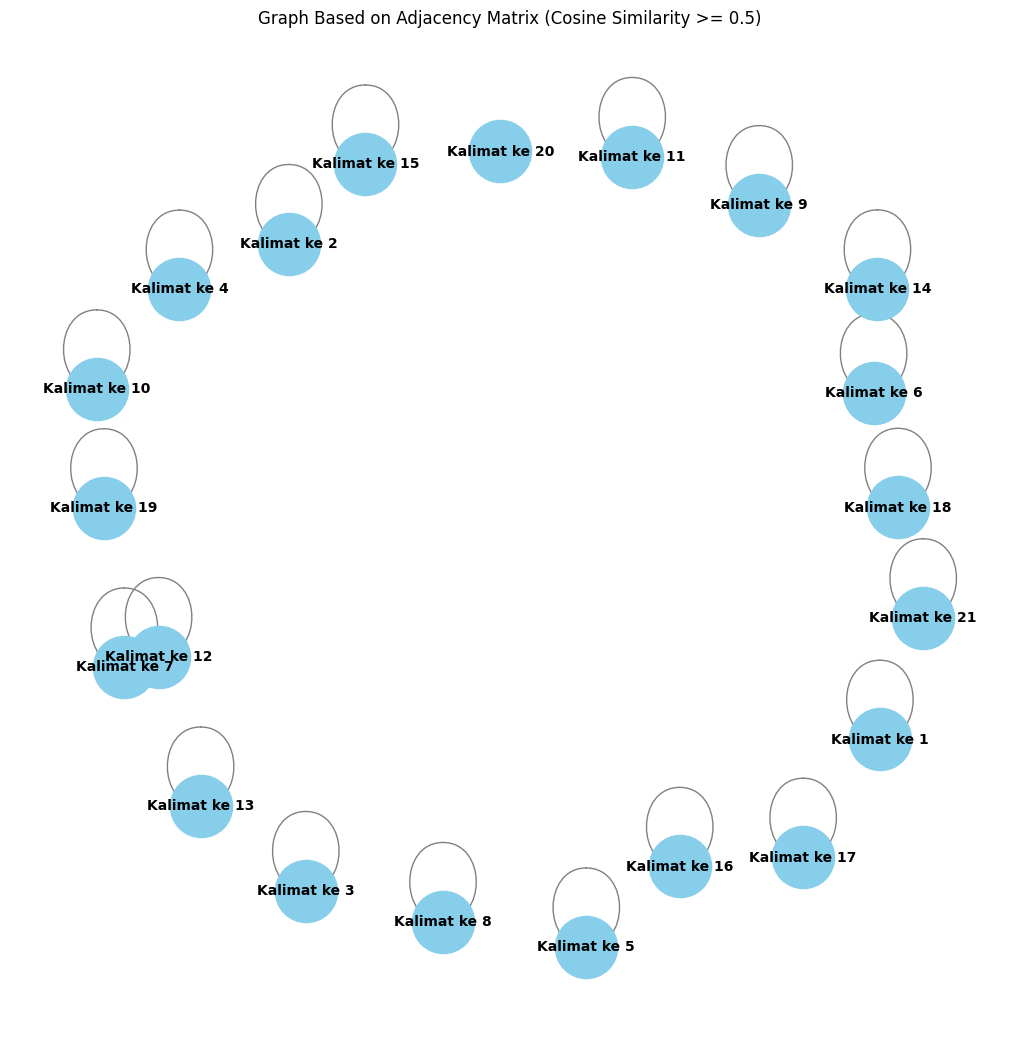

In [10]:
# Buat graf dari matriks adjacency
G = nx.from_numpy_array(adjacency_matrix)

# Atur label node agar sesuai dengan 'kalimat ke n'
mapping = {i: f"Kalimat ke {i+1}" for i in range(len(result_df))}
G = nx.relabel_nodes(G, mapping)

# Menggambar graf
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)  # Atur layout graf
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black', edge_color='gray', linewidths=1, font_weight='bold')

# Tampilkan graf
plt.title("Graph Based on Adjacency Matrix (Cosine Similarity >= 0.5)")
plt.show()

In [11]:
# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Menghitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Menghitung closeness centrality
closeness_centrality = nx.closeness_centrality(G)

# Buat dataframe untuk menampilkan hasil centrality
centrality_df = pd.DataFrame({
    'Kalimat': list(betweenness_centrality.keys()),
    'Betweenness Centrality': list(betweenness_centrality.values()),
    'Degree Centrality': list(degree_centrality.values()),
    'Closeness Centrality': list(closeness_centrality.values())
})

# Tampilkan dataframe centrality
centrality_df


,Kalimat,Betweenness Centrality,Degree Centrality,Closeness Centrality
0,Kalimat ke 1,0.0,0.10,0.00
1,Kalimat ke 2,0.0,0.10,0.00
2,Kalimat ke 3,0.0,0.10,0.00
3,Kalimat ke 4,0.0,0.10,0.00
4,Kalimat ke 5,0.0,0.10,0.00
5,Kalimat ke 6,0.0,0.10,0.00
6,Kalimat ke 7,0.0,0.15,0.05
7,Kalimat ke 8,0.0,0.10,0.00
8,Kalimat ke 9,0.0,0.10,0.00
9,Kalimat ke 10,0.0,0.10,0.00
